In [24]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from word_embedding import get_wordVectors
from get_data import get_data

In [28]:
def tsne_plot(model, word_dic):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    cnt = 0
    for key in word_dic:
        if key in model:
            cnt+=1
            tokens.append(model[key])
            labels.append(key)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    print (cnt)
    plt.show()

1466


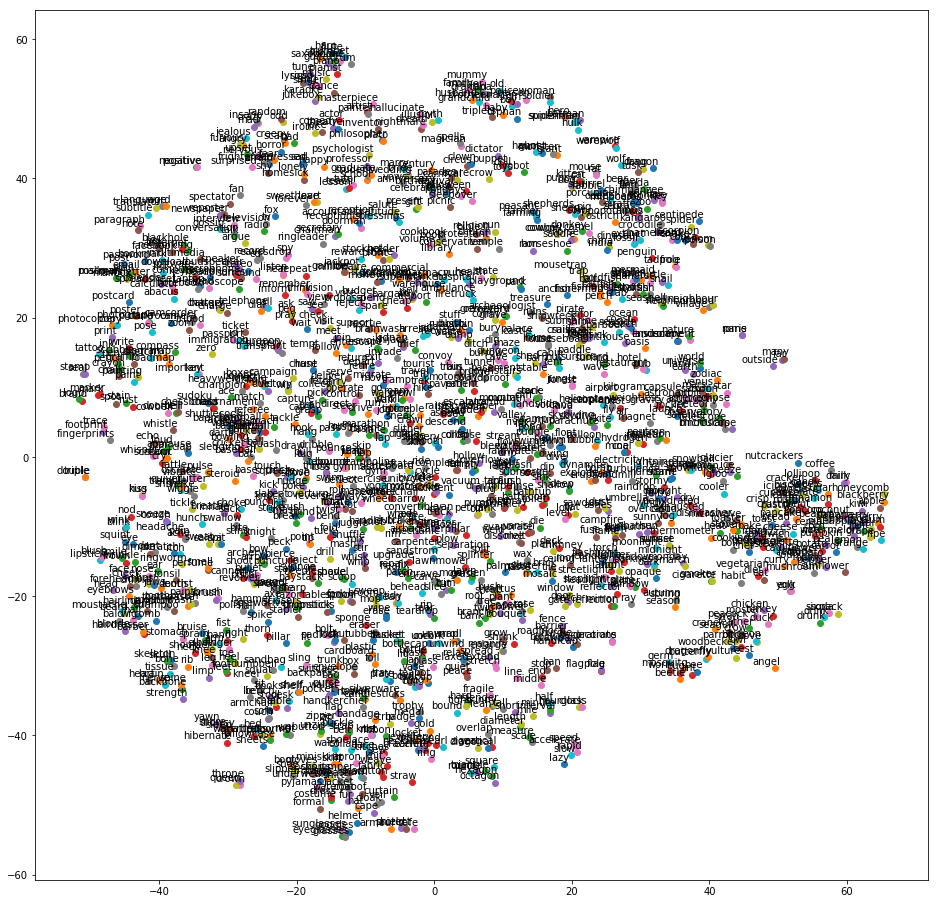

In [30]:
if __name__ == "__main__":
    file_name="../data/Pictionary Master Target Phrase List - Phrase List.csv"
    word_dic = get_data(file_name)
    
    numberbatch_file = 'numberbatch-en-17.06.txt'
    numberbatch_dir = '../data/'

    fpath = numberbatch_dir + numberbatch_file
    emb_dict = get_wordVectors(fpath)
    
    tsne_plot(emb_dict, word_dic)